In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrandom
import src.data.ToyData as ToyData
import src.NeuralOp.neural_operator as neural_operator
import src.NeuralOp.blocks as blocks
import src.Trainer as Trainer
import src.SDESolver as SDESolver
import src.SDE as SDE
from src.plot import plot_trajectory_2d, plot_matrix, plot_score_field
import matplotlib.pyplot as plt
import random 
import experiments.ssm_config as ssm_config

def get_random_int():
    return random.randint(0, 1000000)

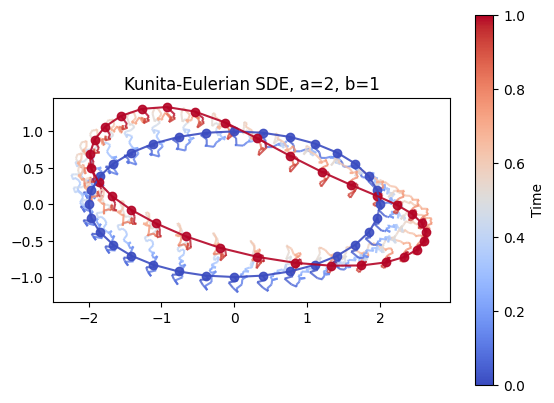

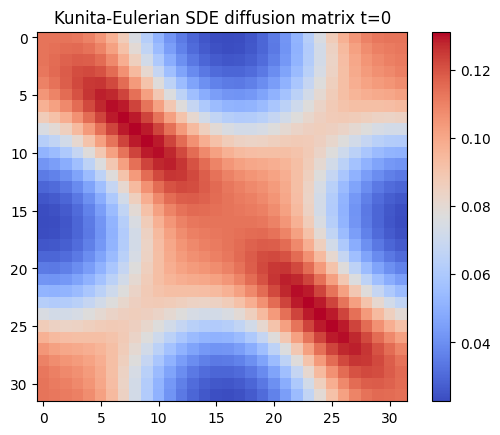

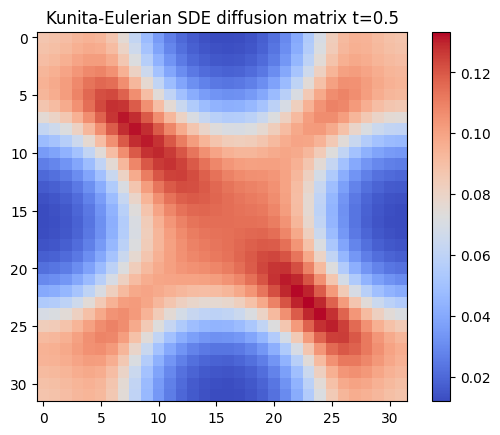

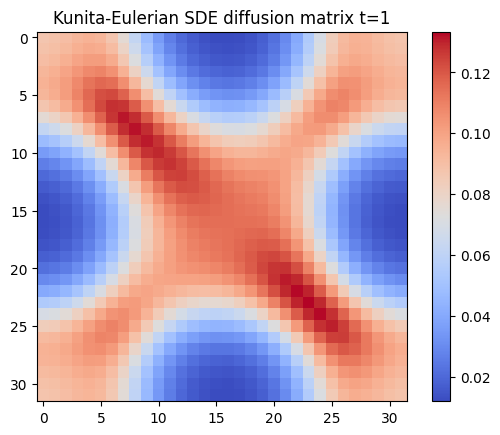

(16, 51, 32, 2)
(16, 32, 2)


Training neural operator:   0%|          | 0/1000 [00:00<?, ?it/s]

(50, 16)


Training loss: 67.20844268798828: 100%|██████████| 1000/1000 [00:31<00:00, 32.07it/s]


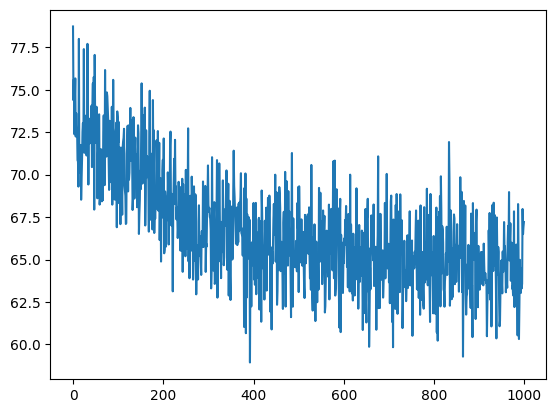

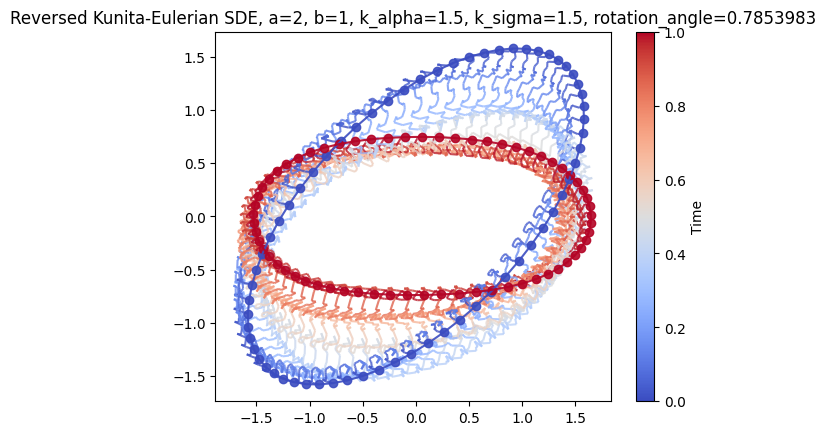

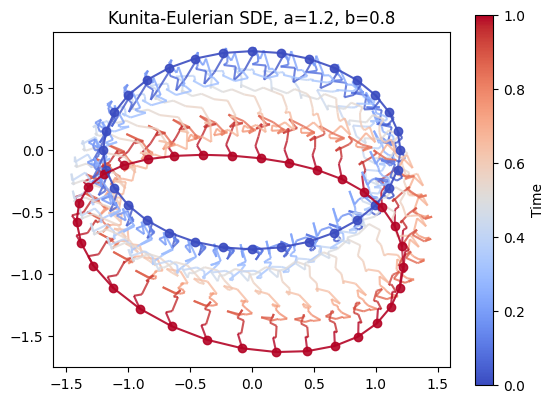

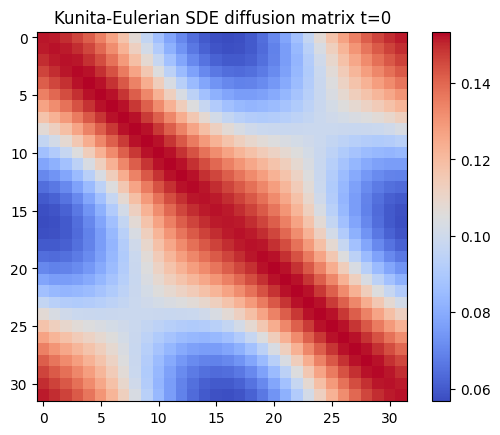

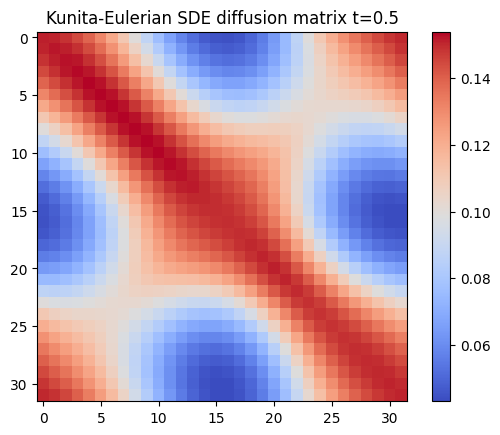

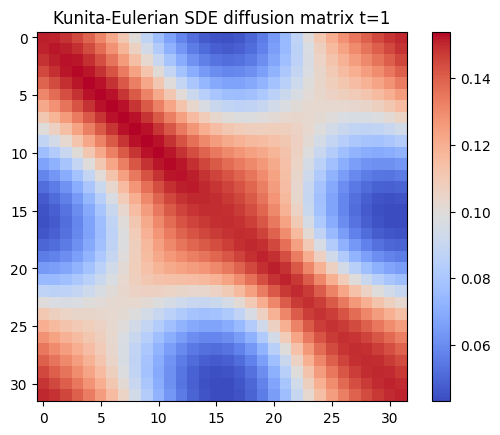

Training neural operator:   0%|          | 0/1000 [00:00<?, ?it/s]

(50, 8)


Training loss: 72.0084228515625: 100%|██████████| 1000/1000 [00:25<00:00, 39.54it/s] 


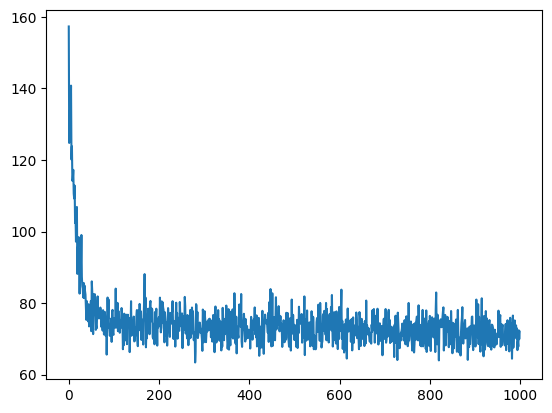

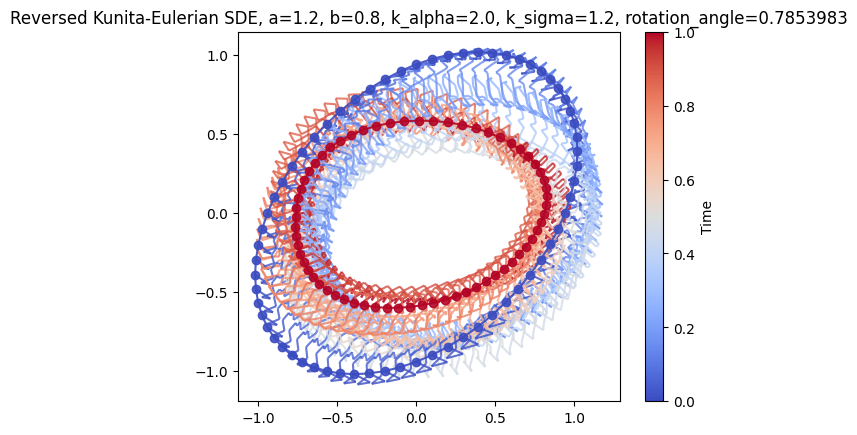

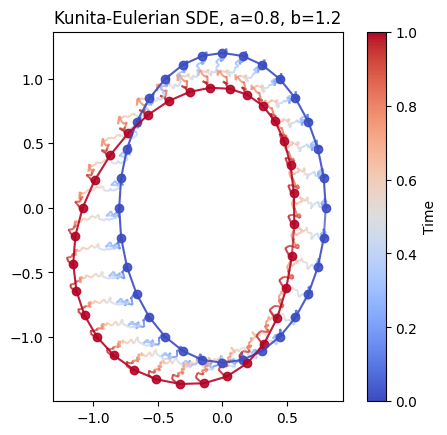

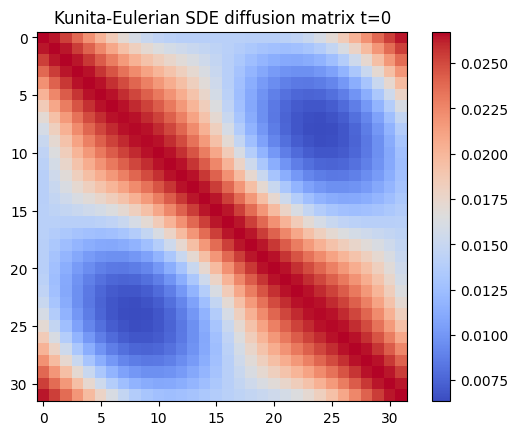

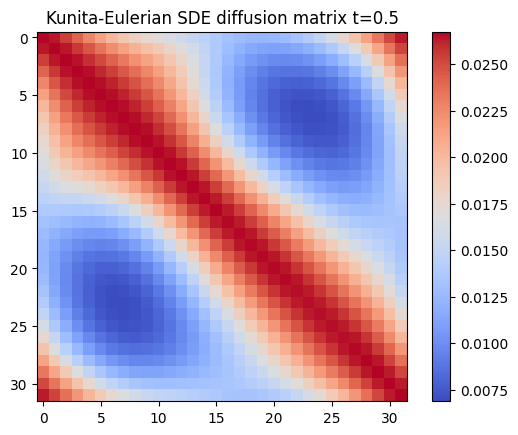

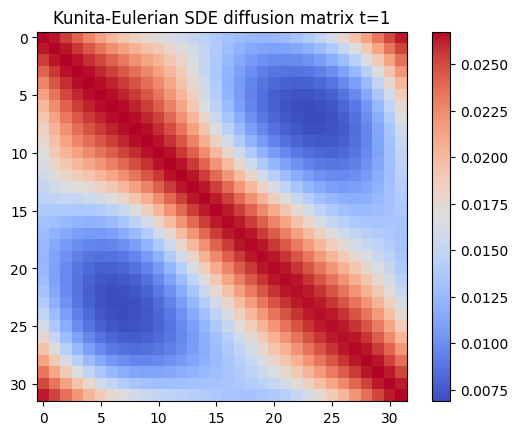

Training neural operator:   0%|          | 0/5000 [00:00<?, ?it/s]

(50, 16)


Training loss: 47.23143768310547: 100%|██████████| 5000/5000 [02:04<00:00, 40.01it/s] 


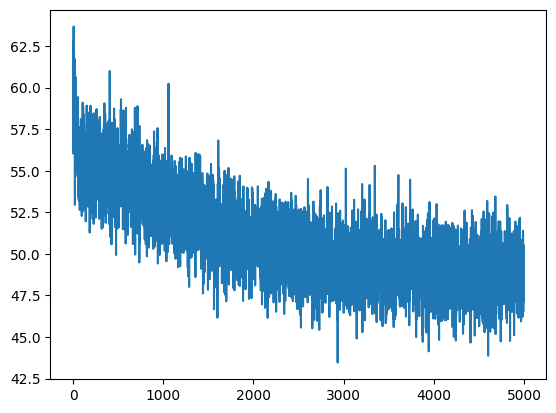

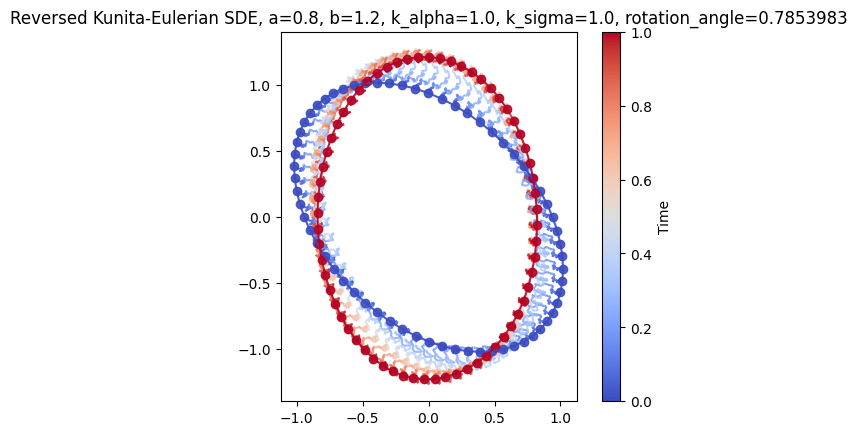

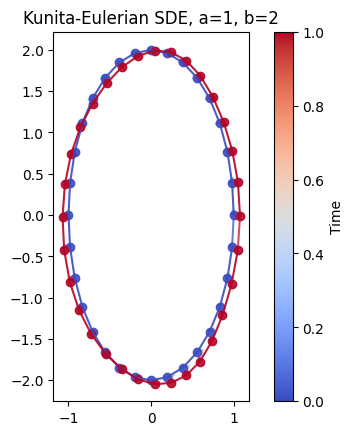

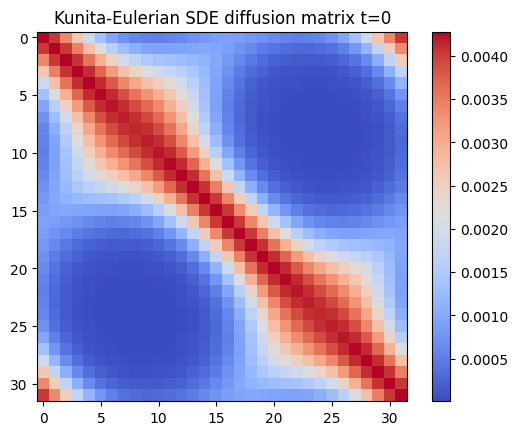

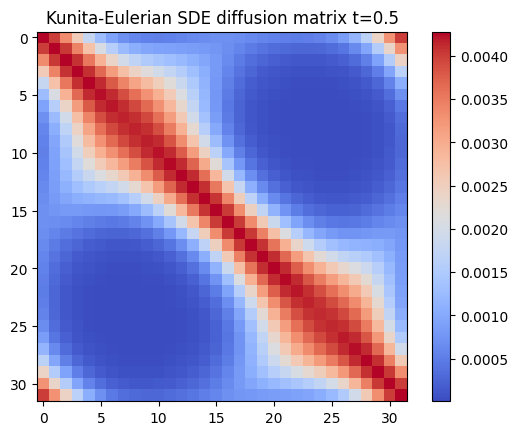

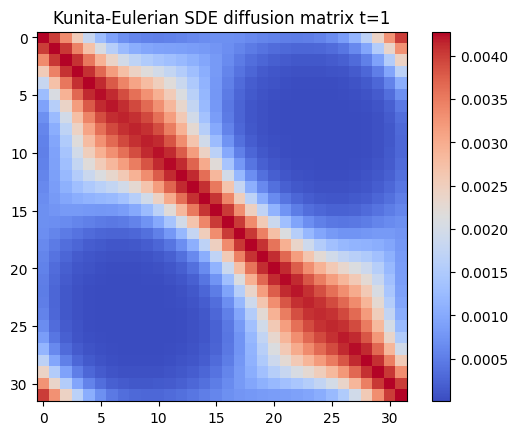

Training neural operator:   0%|          | 0/1000 [00:00<?, ?it/s]

(50, 16)


Training loss: 62.75254440307617: 100%|██████████| 1000/1000 [00:29<00:00, 33.50it/s]


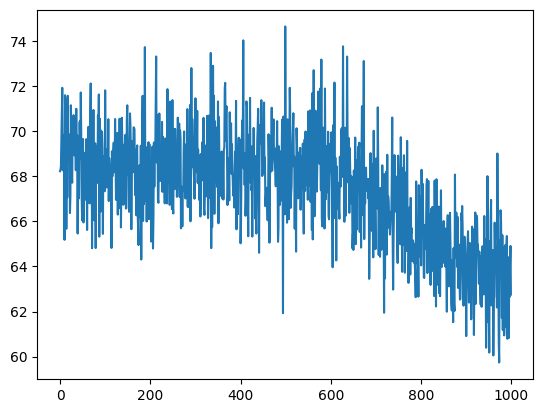

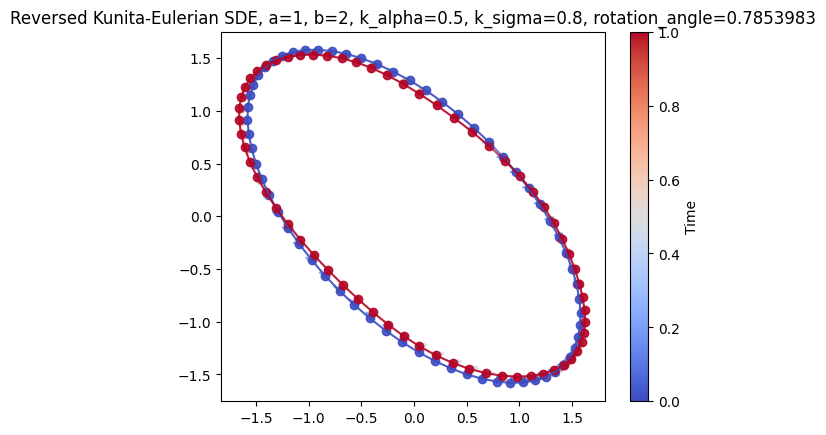

In [2]:
import src.math.geometry as geometry
import src.data.ToyData as ToyData
import jax.lax as lax
rotation_matrix_1 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][0]
rotation_matrix_2 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][1]
rotation_matrix_3 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][2]
rotation_matrix_4 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][3]
a_1 = ssm_config.data_generator_configs['data_generator_params']['a'][0]
a_2 = ssm_config.data_generator_configs['data_generator_params']['a'][1]
a_3 = ssm_config.data_generator_configs['data_generator_params']['a'][2]
a_4 = ssm_config.data_generator_configs['data_generator_params']['a'][3]
b_1 = ssm_config.data_generator_configs['data_generator_params']['b'][0]
b_2 = ssm_config.data_generator_configs['data_generator_params']['b'][1]
b_3 = ssm_config.data_generator_configs['data_generator_params']['b'][2]
b_4 = ssm_config.data_generator_configs['data_generator_params']['b'][3]
rotation_matrix_1 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][0]
rotation_matrix_2 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][1]
rotation_matrix_3 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][2]
rotation_matrix_4 = ssm_config.data_generator_configs['data_generator_params']['rotation_matrix'][3]
center_1 = ssm_config.data_generator_configs['data_generator_params']['center'][0]
center_2 = ssm_config.data_generator_configs['data_generator_params']['center'][1]
center_3 = ssm_config.data_generator_configs['data_generator_params']['center'][2]
center_4 = ssm_config.data_generator_configs['data_generator_params']['center'][3]
k_alpha_1 = ssm_config.eulerian_sde_configs['sde_params']['k_alpha'][0]
k_alpha_2 = ssm_config.eulerian_sde_configs['sde_params']['k_alpha'][1]
k_alpha_3 = ssm_config.eulerian_sde_configs['sde_params']['k_alpha'][2]
k_alpha_4 = ssm_config.eulerian_sde_configs['sde_params']['k_alpha'][3]
k_sigma_1 = ssm_config.eulerian_sde_configs['sde_params']['k_sigma'][0]
k_sigma_2 = ssm_config.eulerian_sde_configs['sde_params']['k_sigma'][1]
k_sigma_3 = ssm_config.eulerian_sde_configs['sde_params']['k_sigma'][2]
k_sigma_4 = ssm_config.eulerian_sde_configs['sde_params']['k_sigma'][3]
grid_range = ssm_config.eulerian_sde_configs['sde_params']['grid_range']
dt = ssm_config.eulerian_sde_configs['sde_params']['dt']
grid_size = ssm_config.eulerian_sde_configs['sde_params']['grid_size']


ellipse_data_generator_1 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_1, b=b_1, rotation_matrix=rotation_matrix_1, center=center_1, seed=get_random_int())
ellipse_data_generator_2 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_2, b=b_2, rotation_matrix=rotation_matrix_1, center=center_2, seed=get_random_int())
ellipse_data_generator_3 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_3, b=b_3, rotation_matrix=rotation_matrix_1, center=center_3, seed=get_random_int())
ellipse_data_generator_4 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_4, b=b_4, rotation_matrix=rotation_matrix_1, center=center_4, seed=get_random_int())

x_0_1 = ellipse_data_generator_1.generate_data(batch_size=16)
x_0_2 = ellipse_data_generator_2.generate_data(batch_size=16)
x_0_3 = ellipse_data_generator_3.generate_data(batch_size=16)
x_0_4 = ellipse_data_generator_4.generate_data(batch_size=16)

kunita_eulerian_sde_1 = SDE.Kunita_Eulerian_SDE(sigma=k_alpha_1, kappa=k_sigma_1, grid_dim=2, grid_num=grid_size, grid_range=grid_range, x0=x_0_1[0])
kunita_eulerian_sde_2 = SDE.Kunita_Eulerian_SDE(sigma=k_alpha_2, kappa=k_sigma_2, grid_dim=2, grid_num=grid_size, grid_range=grid_range, x0=x_0_2[0])
kunita_eulerian_sde_3 = SDE.Kunita_Eulerian_SDE(sigma=k_alpha_3, kappa=k_sigma_3, grid_dim=2, grid_num=grid_size, grid_range=grid_range, x0=x_0_3[0])
kunita_eulerian_sde_4 = SDE.Kunita_Eulerian_SDE(sigma=k_alpha_4, kappa=k_sigma_4, grid_dim=2, grid_num=grid_size, grid_range=grid_range, x0=x_0_4[0])


kunita_eulerian_sde_solver_1 = SDESolver.EulerMaruyama.from_sde(kunita_eulerian_sde_1, dt, 1, 2)
kunita_eulerian_sde_solver_2 = SDESolver.EulerMaruyama.from_sde(kunita_eulerian_sde_2, dt, 1, 2)
kunita_eulerian_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(kunita_eulerian_sde_3, dt, 1, 2)
kunita_eulerian_sde_solver_4 = SDESolver.EulerMaruyama.from_sde(kunita_eulerian_sde_4, dt, 1, 2)

model = neural_operator.CTUNO1D(out_co_dim=2, lifting_dim=16, co_dims_fmults=(1, 2, 4), n_modes_per_layer=(8, 4, 2), norm="instance", act="leaky_relu")

trainer = Trainer.NeuralOpTrainer(seed=get_random_int())


xs_1, diffusions_1 = jax.vmap(kunita_eulerian_sde_solver_1.solve, in_axes=(0, None))(x_0_1, jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_1[0], "Kunita-Eulerian SDE, a="+str(a_1)+", b="+str(b_1), simplified=False)
plot_matrix(diffusions_1[0, 0] @ diffusions_1[0, 0].T, "Kunita-Eulerian SDE diffusion matrix t=0")
plot_matrix(diffusions_1[0,49] @ diffusions_1[0,49].T, "Kunita-Eulerian SDE diffusion matrix t=0.5")
plot_matrix(diffusions_1[0, -1] @ diffusions_1[0, -1].T, "Kunita-Eulerian SDE diffusion matrix t=1")
plt.show()
print(xs_1.shape)
print(x_0_1.shape)
train_state_1 = trainer.train_state_init(model, lr=5e-4, model_kwargs={'x': jax.random.normal(jrandom.PRNGKey(get_random_int()), x_0_1[0].shape), 't': jnp.array([0]), 'x0': x_0_1[0], 'object_fn': 'Heng'})
train_state_1, losses_1 = trainer.train(train_state_1, kunita_eulerian_sde_1, kunita_eulerian_sde_solver_1, ellipse_data_generator_1, 1000, batch_size=16)
plt.plot(losses_1)
plt.show()
score_fn_1 = lambda x, t, x0: train_state_1.apply_fn(train_state_1.params, x, t)
ellipse_data_generator_test_1 = ToyData.EllipseDataGenerator(landmark_num=64, a=a_1, b=b_1, rotation_matrix=rotation_matrix_2, center=center_1, seed=get_random_int())
xt_1 = ellipse_data_generator_test_1.generate_data(1)
reversed_sde_1 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_1, score_fn_1, 1, 0.01)
reversed_sde_solver_1 = SDESolver.EulerMaruyama.from_sde(reversed_sde_1, 0.01, 1, 2, condition_x=x_0_1[0])
xs_1, _ = reversed_sde_solver_1.solve(xt_1[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_1, "Reversed Kunita-Eulerian SDE, a="+str(a_1)+", b="+str(b_1)+", k_alpha="+str(k_alpha_1)+", k_sigma="+str(k_sigma_1)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()


xs_2, diffusions_2 = jax.vmap(kunita_eulerian_sde_solver_2.solve, in_axes=(0, None))(x_0_2, jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_2[0], "Kunita-Eulerian SDE, a="+str(a_2)+", b="+str(b_2), simplified=False)
plot_matrix(diffusions_2[0, 0] @ diffusions_2[0, 0].T, "Kunita-Eulerian SDE diffusion matrix t=0")
plot_matrix(diffusions_2[0,49] @ diffusions_2[0,49].T, "Kunita-Eulerian SDE diffusion matrix t=0.5")
plot_matrix(diffusions_2[0, -1] @ diffusions_2[0, -1].T, "Kunita-Eulerian SDE diffusion matrix t=1")
plt.show()
train_state_2 = trainer.train_state_init(model, lr=1e-4, model_kwargs={'x': jax.random.normal(jrandom.PRNGKey(get_random_int()), x_0_2[0].shape), 't': jnp.array([0]), 'x0': x_0_2[0], 'object_fn': 'Heng'})
train_state_2, losses_2 = trainer.train(train_state_2, kunita_eulerian_sde_2, kunita_eulerian_sde_solver_2, ellipse_data_generator_2, 1000, batch_size=8)
plt.plot(losses_2)
plt.show()
score_fn_2 = lambda x, t, x0: train_state_2.apply_fn(train_state_2.params, x, t)
ellipse_data_generator_test_2 = ToyData.EllipseDataGenerator(landmark_num=64, a=a_2, b=b_2, rotation_matrix=rotation_matrix_2, center=center_2, seed=get_random_int())
xt_2 = ellipse_data_generator_test_2.generate_data(1)
reversed_sde_2 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_2, score_fn_2, 1, 0.01)
reversed_sde_solver_2 = SDESolver.EulerMaruyama.from_sde(reversed_sde_2, 0.01, 1, 2, condition_x=x_0_2[0])
xs_2, _ = reversed_sde_solver_2.solve(xt_2[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_2, "Reversed Kunita-Eulerian SDE, a="+str(a_2)+", b="+str(b_2)+", k_alpha="+str(k_alpha_2)+", k_sigma="+str(k_sigma_2)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()


xs_3, diffusions_3 = jax.vmap(kunita_eulerian_sde_solver_3.solve, in_axes=(0, None))(x_0_3, jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3[0], "Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3), simplified=False)
plot_matrix(diffusions_3[0, 0] @ diffusions_3[0, 0].T, "Kunita-Eulerian SDE diffusion matrix t=0")
plot_matrix(diffusions_3[0,49] @ diffusions_3[0,49].T, "Kunita-Eulerian SDE diffusion matrix t=0.5")
plot_matrix(diffusions_3[0, -1] @ diffusions_3[0, -1].T, "Kunita-Eulerian SDE diffusion matrix t=1")
plt.show()
train_state_3 = trainer.train_state_init(model, lr=1e-4, model_kwargs={'x': jax.random.normal(jrandom.PRNGKey(get_random_int()), x_0_3[0].shape), 't': jnp.array([0]), 'x0': x_0_3[0], 'object_fn': 'Heng'})
train_state_3, losses_3 = trainer.train(train_state_3, kunita_eulerian_sde_3, kunita_eulerian_sde_solver_3, ellipse_data_generator_3, 5000, batch_size=16)
plt.plot(losses_3)
plt.show()
score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=64, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.01)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.01, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()





xs_4, diffusions_4 = jax.vmap(kunita_eulerian_sde_solver_4.solve, in_axes=(0, None))(x_0_4, jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_4[0], "Kunita-Eulerian SDE, a="+str(a_4)+", b="+str(b_4), simplified=False)
plot_matrix(diffusions_4[0, 0] @ diffusions_4[0, 0].T, "Kunita-Eulerian SDE diffusion matrix t=0")
plot_matrix(diffusions_4[0,49] @ diffusions_4[0,49].T, "Kunita-Eulerian SDE diffusion matrix t=0.5")
plot_matrix(diffusions_4[0, -1] @ diffusions_4[0, -1].T, "Kunita-Eulerian SDE diffusion matrix t=1")
plt.show()



train_state_4 = trainer.train_state_init(model, lr=1e-4, model_kwargs={'x': jax.random.normal(jrandom.PRNGKey(get_random_int()), x_0_4[0].shape), 't': jnp.array([0]), 'x0': x_0_4[0], 'object_fn': 'Heng'})

train_state_4, losses_4 = trainer.train(train_state_4, kunita_eulerian_sde_4, kunita_eulerian_sde_solver_4, ellipse_data_generator_4, 1000, batch_size=16)

plt.plot(losses_4)
plt.show()

score_fn_4 = lambda x, t, x0: train_state_4.apply_fn(train_state_4.params, x, t)

ellipse_data_generator_test_4 = ToyData.EllipseDataGenerator(landmark_num=64, a=a_4, b=b_4, rotation_matrix=rotation_matrix_2, center=center_4, seed=get_random_int())
xt_4 = ellipse_data_generator_test_4.generate_data(1)
reversed_sde_4 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_4, score_fn_4, 1, 0.01)
reversed_sde_solver_4 = SDESolver.EulerMaruyama.from_sde(reversed_sde_4, 0.01, 1, 2, condition_x=x_0_4[0])
xs_4, _ = reversed_sde_solver_4.solve(xt_4[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_4, "Reversed Kunita-Eulerian SDE, a="+str(a_4)+", b="+str(b_4)+", k_alpha="+str(k_alpha_4)+", k_sigma="+str(k_sigma_4)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()


## Evaluate the model on 128 points

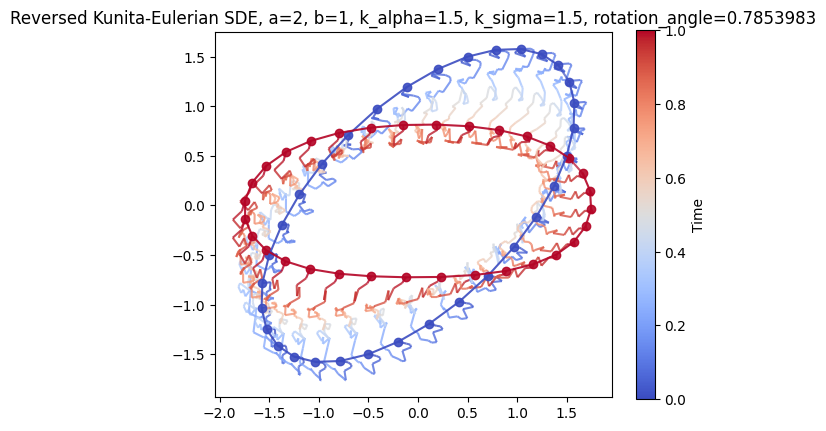

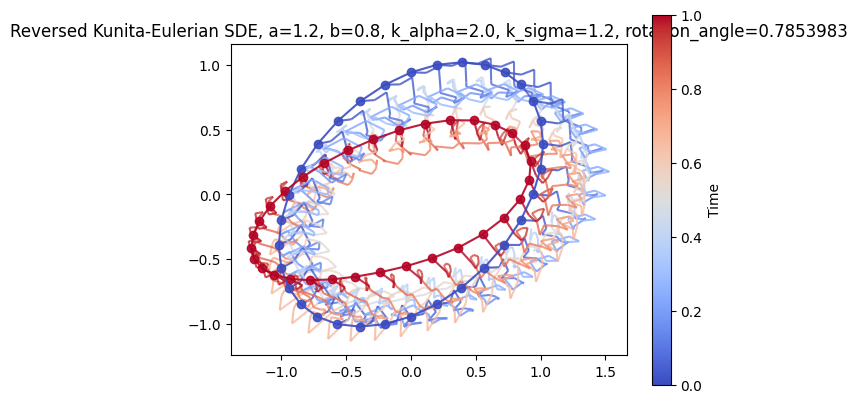

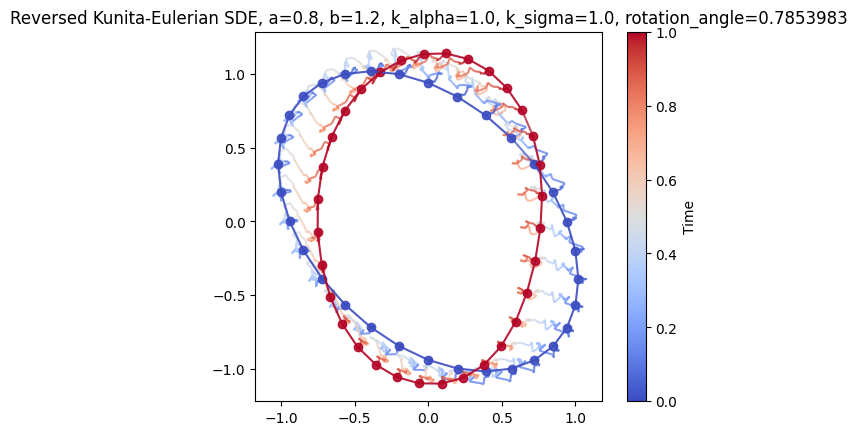

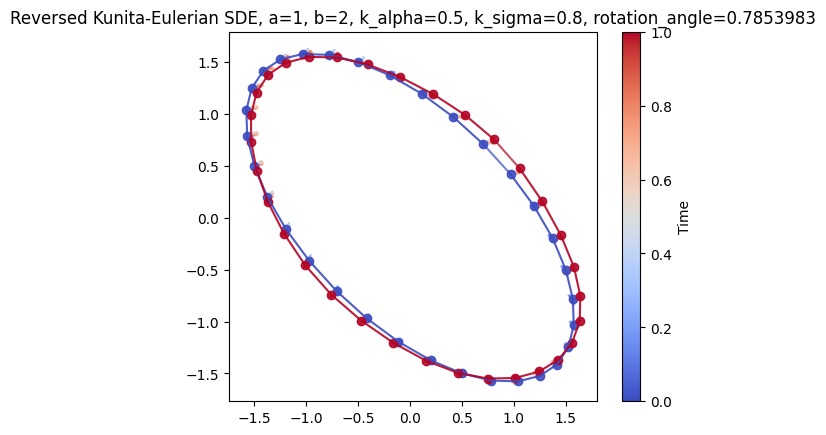

In [3]:
ellipse_data_generator_test_1 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_1, b=b_1, rotation_matrix=rotation_matrix_2, center=center_1, seed=get_random_int())
xt_1 = ellipse_data_generator_test_1.generate_data(1)
reversed_sde_1 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_1, score_fn_1, 1, 0.02)
reversed_sde_solver_1 = SDESolver.EulerMaruyama.from_sde(reversed_sde_1, 0.02, 1, 2, condition_x=x_0_1[0])
xs_1, _ = reversed_sde_solver_1.solve(xt_1[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_1, "Reversed Kunita-Eulerian SDE, a="+str(a_1)+", b="+str(b_1)+", k_alpha="+str(k_alpha_1)+", k_sigma="+str(k_sigma_1)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()


score_fn_2 = lambda x, t, x0: train_state_2.apply_fn(train_state_2.params, x, t)
ellipse_data_generator_test_2 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_2, b=b_2, rotation_matrix=rotation_matrix_2, center=center_2, seed=get_random_int())
xt_2 = ellipse_data_generator_test_2.generate_data(1)
reversed_sde_2 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_2, score_fn_2, 1, 0.02)
reversed_sde_solver_2 = SDESolver.EulerMaruyama.from_sde(reversed_sde_2, 0.02, 1, 2, condition_x=x_0_2[0])
xs_2, _ = reversed_sde_solver_2.solve(xt_2[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_2, "Reversed Kunita-Eulerian SDE, a="+str(a_2)+", b="+str(b_2)+", k_alpha="+str(k_alpha_2)+", k_sigma="+str(k_sigma_2)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()


score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.02)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.02, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()

score_fn_4 = lambda x, t, x0: train_state_4.apply_fn(train_state_4.params, x, t)

ellipse_data_generator_test_4 = ToyData.EllipseDataGenerator(landmark_num=32, a=a_4, b=b_4, rotation_matrix=rotation_matrix_2, center=center_4, seed=get_random_int())
xt_4 = ellipse_data_generator_test_4.generate_data(1)
reversed_sde_4 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_4, score_fn_4, 1, 0.02)
reversed_sde_solver_4 = SDESolver.EulerMaruyama.from_sde(reversed_sde_4, 0.02, 1, 2, condition_x=x_0_4[0])
xs_4, _ = reversed_sde_solver_4.solve(xt_4[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_4, "Reversed Kunita-Eulerian SDE, a="+str(a_4)+", b="+str(b_4)+", k_alpha="+str(k_alpha_4)+", k_sigma="+str(k_sigma_4)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2)), simplified=False)
plt.show()

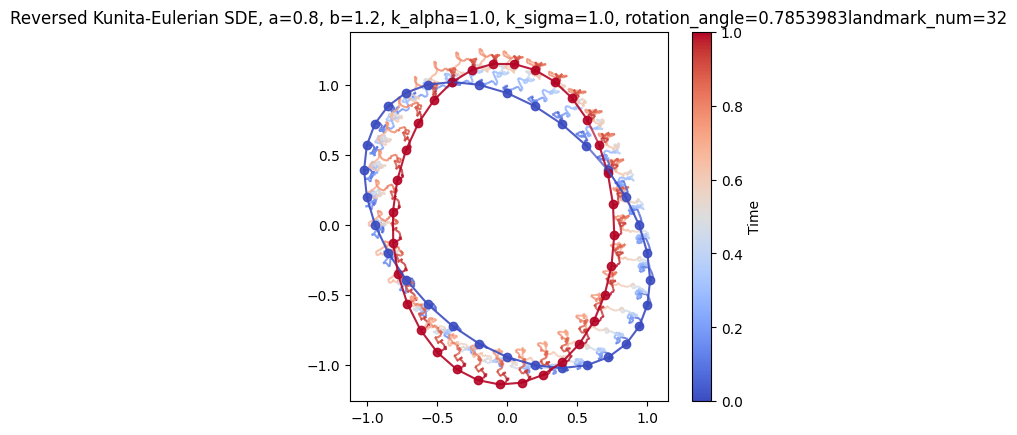

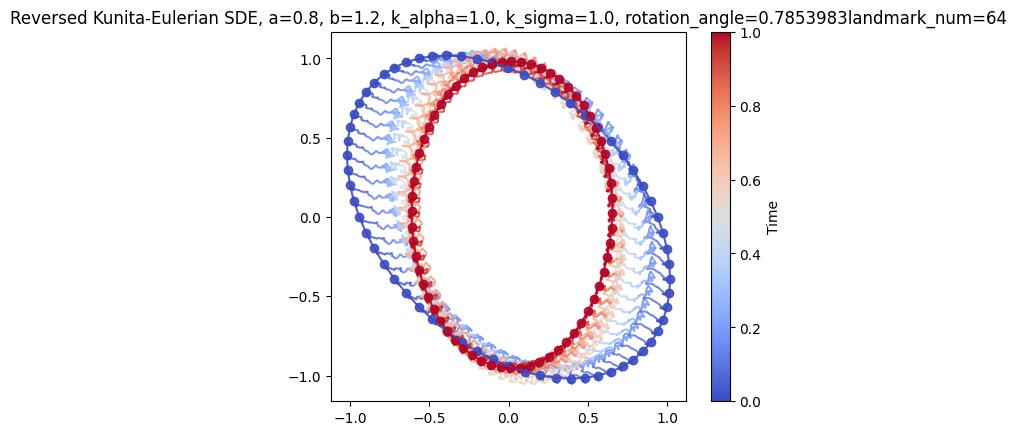

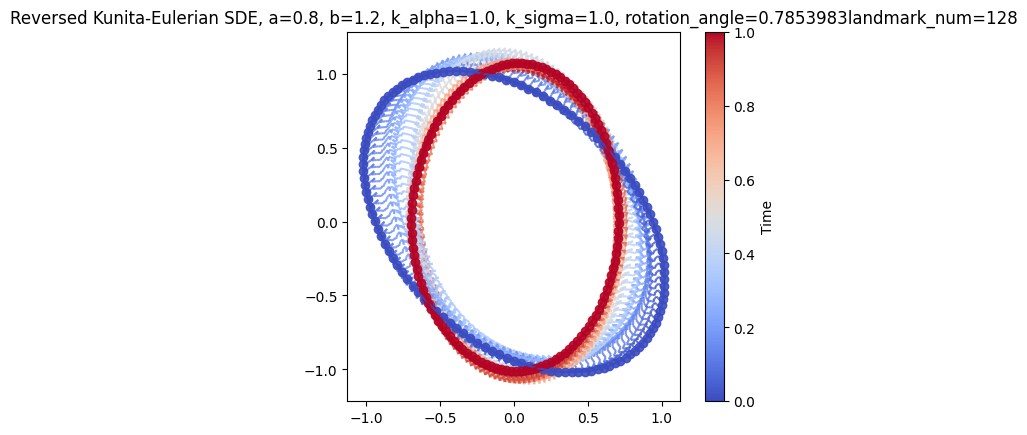

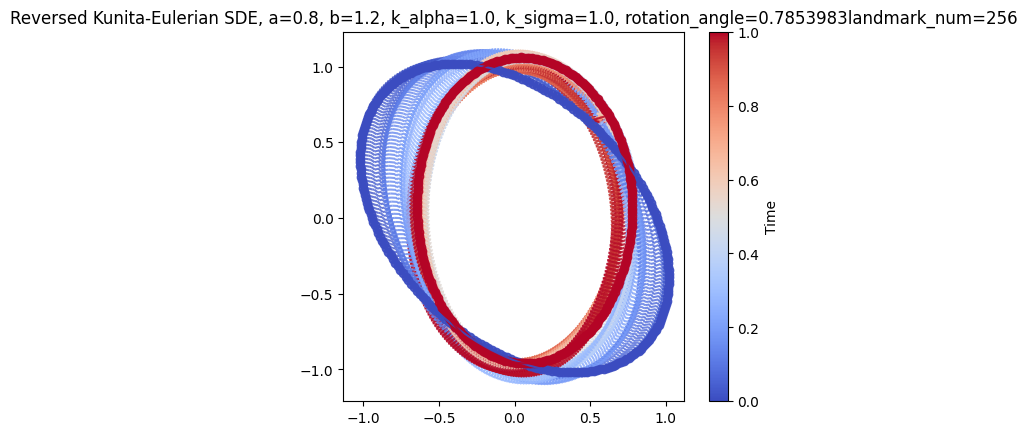

In [5]:
score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
landmark_num = 32
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=landmark_num, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.01)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.01, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2))+", landmark_num="+str(landmark_num), simplified=False)

landmark_num = 64
score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=landmark_num, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.01)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.01, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2))+", landmark_num="+str(landmark_num), simplified=False)
plt.show()

landmark_num = 128
score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=landmark_num, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.01)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.01, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2))+", landmark_num="+str(landmark_num), simplified=False)
plt.show()

landmark_num = 256
score_fn_3 = lambda x, t, x0: train_state_3.apply_fn(train_state_3.params, x, t)
ellipse_data_generator_test_3 = ToyData.EllipseDataGenerator(landmark_num=landmark_num, a=a_3, b=b_3, rotation_matrix=rotation_matrix_2, center=center_3, seed=get_random_int())
xt_3 = ellipse_data_generator_test_3.generate_data(1)
reversed_sde_3 = SDE.Time_Reversed_SDE(kunita_eulerian_sde_3, score_fn_3, 1, 0.01)
reversed_sde_solver_3 = SDESolver.EulerMaruyama.from_sde(reversed_sde_3, 0.01, 1, 2, condition_x=x_0_3[0])
xs_3, _ = reversed_sde_solver_3.solve(xt_3[0], jrandom.PRNGKey(get_random_int()))
plot_trajectory_2d(xs_3, "Reversed Kunita-Eulerian SDE, a="+str(a_3)+", b="+str(b_3)+", k_alpha="+str(k_alpha_3)+", k_sigma="+str(k_sigma_3)+", rotation_angle="+str(geometry.get_rotation_angle(rotation_matrix_2))+", landmark_num="+str(landmark_num), simplified=False)
plt.show()
